<font color='orange'>**DSBDAL Ass. 7 - Text Analytics**</font><br/>

### 1. Extract Sample document and apply following document preprocessing methods: Tokenization, POS Tagging, Stop Words Removal, Stemming and Lemmatization.

#### **0. Input txt file** :

In [60]:
data = []
with open('7_story.txt','r') as f:
    data = f.read()
data = data.split("\n")

#### **1. Tokenize** :
##### (Extract words)

In [61]:
from nltk.tokenize import word_tokenize
sentences = [word_tokenize(x) for x in data]
sentences[0][:10]

['But', 'they', 'did', 'not', 'speak', ',', 'or', 'open', 'the', 'door']

#### **2. Part of Speech Tagging** :
##### (Noun, verb etc ... tagging)

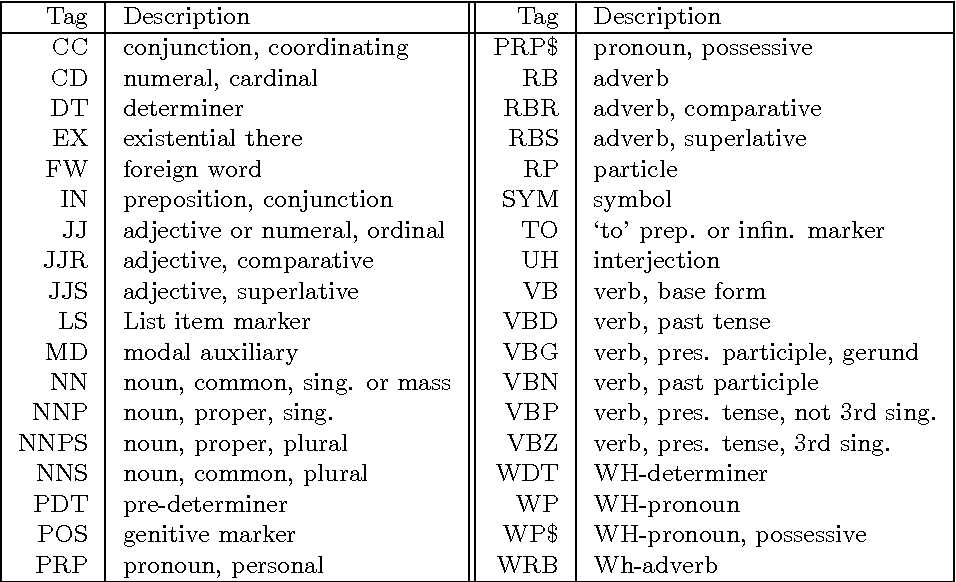

In [62]:
# Parts of speech
from IPython.display import Image
Image(filename='./pos.png')

In [63]:
import nltk

tagged = []
for words in sentences:
    tagged = nltk.pos_tag(words)
tagged[:5]

[('Little', 'JJ'),
 ('Red', 'NNP'),
 ('Riding', 'NNP'),
 ('Hood', 'NNP'),
 ('carried', 'VBD')]

#### **3. Stopwords removal** :
##### (Remove common words like the, it etc..)

In [64]:
from nltk.corpus import stopwords
s = stopwords.words('english')

In [65]:
for i, sentence in enumerate(sentences):
    temp = []
    for word in sentence:
        if word not in s:
            temp.append(word)
    data[i] = " ".join(temp)

In [66]:
data[0]

'But speak , open door , grey-beard stole twice thrice round house , last jumped roof , intending wait Little Red Riding Hood went home evening , steal devour darkness . But grandmother saw thoughts . In front house great stone trough , said child , take pail , Little Red Riding Hood . I made sausages yesterday , carry water I boiled trough .'

#### **4. Stemming** :
##### (Extract singular/root words, but not perfect, eg: carry gives carri)

In [67]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

stemmed = []
for i, x in enumerate(data):
    words = word_tokenize(x)
    temp = []
    for word in words:
        temp.append(stemmer.stem(word))
    stemmed.append(" ".join(temp))

In [68]:
stemmed[0]

'but speak , open door , grey-beard stole twice thrice round hous , last jump roof , intend wait littl red ride hood went home even , steal devour dark . but grandmoth saw thought . in front hous great stone trough , said child , take pail , littl red ride hood . i made sausag yesterday , carri water i boil trough .'

#### **5. Lemmatization** :
##### (Extract root words, better than stemming)

In [72]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer() 

lemmatized = []
for i, x in enumerate(data):
    words = word_tokenize(x)
    temp = []
    for word in words:
        temp.append(lem.lemmatize(word, pos='v'))
    lemmatized.append(" ".join(temp))

In [73]:
lemmatized[0]

'But speak , open door , grey-beard steal twice thrice round house , last jump roof , intend wait Little Red Riding Hood go home even , steal devour darkness . But grandmother saw thoughts . In front house great stone trough , say child , take pail , Little Red Riding Hood . I make sausages yesterday , carry water I boil trough .'

### 2. Create representation of document by calculating Term Frequency and Inverse Document Frequency.

#### **6. Calculating TF-IDF for one word and comparing** :

In [75]:
data = lemmatized
data[0]

'But speak , open door , grey-beard steal twice thrice round house , last jump roof , intend wait Little Red Riding Hood go home even , steal devour darkness . But grandmother saw thoughts . In front house great stone trough , say child , take pail , Little Red Riding Hood . I make sausages yesterday , carry water I boil trough .'

In [121]:
data[1]

'Little Red Riding Hood carry great trough quite full . Then smell sausages reach wolf , sniff peep , last stretch neck far could longer keep foot begin slip , slip roof straight great trough , drown . But Little Red Riding Hood go joyously home , one ever anything harm .'

#### **tf(t,d)** = Occurences of t in document d

In [215]:
tf_beard_doc_0 = 1
tf_beard_doc_1 = 0

#### **idf(t)** = log [ 1+N / 1+df(t) ] + 1 
##### df(t) = Occurences in all documents = Here, 1
##### N = No. of documents = Here, 2

In [216]:
import math
idf_beard_doc_0 = math.log( (1+2) / (1+1) ) + 1
idf_beard_doc_1 = math.log( (1+2) / (1+0) ) + 1

In [217]:
tf_beard_doc_0 * idf_beard_doc_0

1.4054651081081644

#### **7. Sklearn TfidfVectorizer, without normalization** :

In [223]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(norm=None)

In [224]:
vect = cv.fit_transform(data)

In [225]:
print(cv.get_feature_names_out())

['anything' 'beard' 'begin' 'boil' 'but' 'carry' 'child' 'could'
 'darkness' 'devour' 'door' 'drown' 'even' 'ever' 'far' 'foot' 'front'
 'full' 'go' 'grandmother' 'great' 'grey' 'harm' 'home' 'hood' 'house'
 'in' 'intend' 'joyously' 'jump' 'keep' 'last' 'little' 'longer' 'make'
 'neck' 'one' 'open' 'pail' 'peep' 'quite' 'reach' 'red' 'riding' 'roof'
 'round' 'sausages' 'saw' 'say' 'slip' 'smell' 'sniff' 'speak' 'steal'
 'stone' 'straight' 'stretch' 'take' 'then' 'thoughts' 'thrice' 'trough'
 'twice' 'wait' 'water' 'wolf' 'yesterday']


In [226]:
print(vect.toarray())

[[0.         1.40546511 0.         1.40546511 2.         1.
  1.40546511 0.         1.40546511 1.40546511 1.40546511 0.
  1.40546511 0.         0.         0.         1.40546511 0.
  1.         1.40546511 1.         1.40546511 0.         1.
  2.         2.81093022 1.40546511 1.40546511 0.         1.40546511
  0.         1.         2.         0.         1.40546511 0.
  0.         1.40546511 1.40546511 0.         0.         0.
  2.         2.         1.         1.40546511 1.         1.40546511
  1.40546511 0.         0.         0.         1.40546511 2.81093022
  1.40546511 0.         0.         1.40546511 0.         1.40546511
  1.40546511 2.         1.40546511 1.40546511 1.40546511 0.
  1.40546511]
 [1.40546511 0.         1.40546511 0.         1.         1.
  0.         1.40546511 0.         0.         0.         1.40546511
  0.         1.40546511 1.40546511 1.40546511 0.         1.40546511
  1.         0.         2.         0.         1.40546511 1.
  2.         0.         0.         0. 

#### **7. Sklearn TfidfVectorizer, with normalization** :

In [227]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()

In [228]:
vect = cv.fit_transform(data)

In [229]:
print(cv.get_feature_names_out())

['anything' 'beard' 'begin' 'boil' 'but' 'carry' 'child' 'could'
 'darkness' 'devour' 'door' 'drown' 'even' 'ever' 'far' 'foot' 'front'
 'full' 'go' 'grandmother' 'great' 'grey' 'harm' 'home' 'hood' 'house'
 'in' 'intend' 'joyously' 'jump' 'keep' 'last' 'little' 'longer' 'make'
 'neck' 'one' 'open' 'pail' 'peep' 'quite' 'reach' 'red' 'riding' 'roof'
 'round' 'sausages' 'saw' 'say' 'slip' 'smell' 'sniff' 'speak' 'steal'
 'stone' 'straight' 'stretch' 'take' 'then' 'thoughts' 'thrice' 'trough'
 'twice' 'wait' 'water' 'wolf' 'yesterday']


In [230]:
print(vect.toarray())

[[0.         0.13908547 0.         0.13908547 0.19792092 0.09896046
  0.13908547 0.         0.13908547 0.13908547 0.13908547 0.
  0.13908547 0.         0.         0.         0.13908547 0.
  0.09896046 0.13908547 0.09896046 0.13908547 0.         0.09896046
  0.19792092 0.27817094 0.13908547 0.13908547 0.         0.13908547
  0.         0.09896046 0.19792092 0.         0.13908547 0.
  0.         0.13908547 0.13908547 0.         0.         0.
  0.19792092 0.19792092 0.09896046 0.13908547 0.09896046 0.13908547
  0.13908547 0.         0.         0.         0.13908547 0.27817094
  0.13908547 0.         0.         0.13908547 0.         0.13908547
  0.13908547 0.19792092 0.13908547 0.13908547 0.13908547 0.
  0.13908547]
 [0.15304488 0.         0.15304488 0.         0.10889269 0.10889269
  0.         0.15304488 0.         0.         0.         0.15304488
  0.         0.15304488 0.15304488 0.15304488 0.         0.15304488
  0.10889269 0.         0.21778538 0.         0.15304488 0.10889269
  0.21